In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing the data
df = pd.read_csv("worldometer_data.csv")

# Analyzing the Dataset

In [ ]:
df.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [ ]:
df.tail()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
204,Montserrat,North America,4992.0,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,26247.0,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3489.0,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,801.0,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe
208,Western Sahara,Africa,598682.0,10,NaN,1.0,NaN,8.0,NaN,1.0,NaN,17.0,2.0,NaN,NaN,Africa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [ ]:
df.nunique()

Country/Region      209
Continent             6
Population          208
TotalCases          206
NewCases              4
TotalDeaths         150
NewDeaths             3
TotalRecovered      201
NewRecovered          3
ActiveCases         180
Serious,Critical     74
Tot Cases/1M pop    202
Deaths/1M pop       107
TotalTests          190
Tests/1M pop        190
WHO Region            6
dtype: int64

Finding the number and percentage of null values:

In [ ]:
df.isnull().sum()
#(df.isnull().sum()/(len(df)))*100

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

NewCases, NewRecovered, NewDeaths columns primarily consist of null values and we will not use these two columns hence we drop them. We also drop WHO Region column:

In [ ]:
newdf = df.drop(["NewCases", "NewRecovered", "NewDeaths", "WHO Region"], axis = 1)
print(newdf.isnull().sum())
print(newdf.shape)

Country/Region       0
Continent            1
Population           1
TotalCases           0
TotalDeaths         21
TotalRecovered       4
ActiveCases          4
Serious,Critical    87
Tot Cases/1M pop     1
Deaths/1M pop       22
TotalTests          18
Tests/1M pop        18
dtype: int64
(209, 12)


In [ ]:
data = newdf.dropna()
#data = newdf.dropna(subset=["Continent", "Population", "TotalRecovered", "TotalDeaths", "ActiveCases"])
print(data.isnull().sum())
print(data.shape)

Country/Region      0
Continent           0
Population          0
TotalCases          0
TotalDeaths         0
TotalRecovered      0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
dtype: int64
(111, 12)


<ipython-input-65-b699050ce883>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

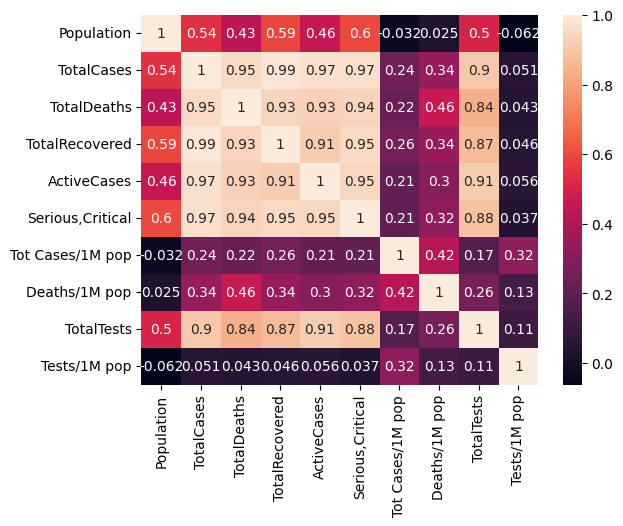

In [ ]:
sns.heatmap(data.corr(), annot=True)

<Axes: title={'center': 'Total Countries/Regions in Each Continent'}, xlabel='Continent'>

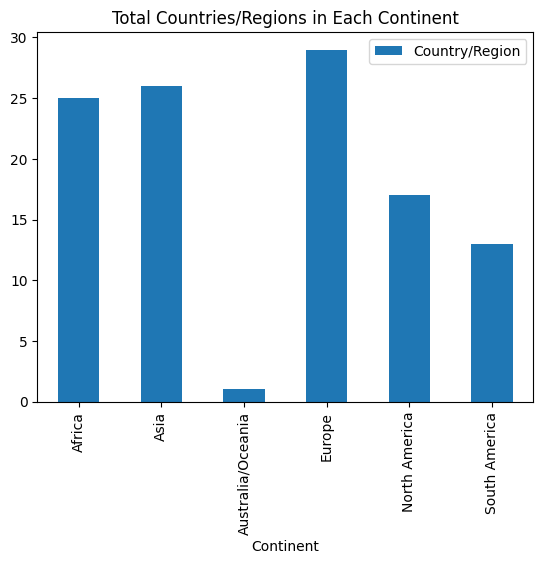

In [ ]:
data[["Country/Region", "Continent"]].groupby("Continent").count().plot.bar(title="Total Countries/Regions in Each Continent")

<Axes: title={'center': 'Total Population in Each Continent'}, xlabel='Continent'>

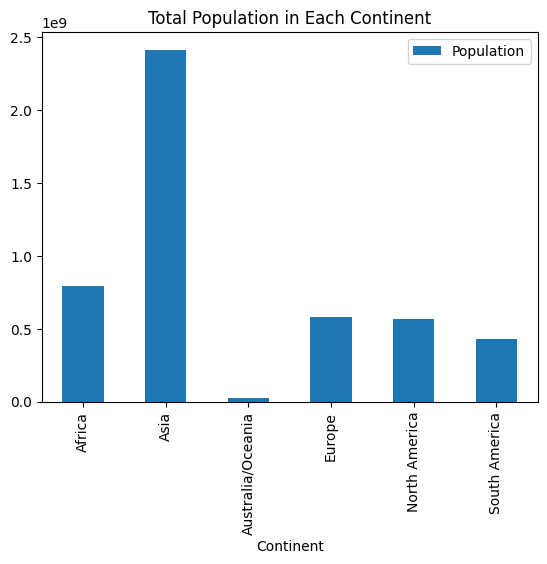

In [ ]:
data[["Continent", "Population"]].groupby("Continent").sum().plot.bar(title="Total Population in Each Continent")

<Axes: title={'center': 'Total Tests in Each Continent'}, xlabel='Continent'>

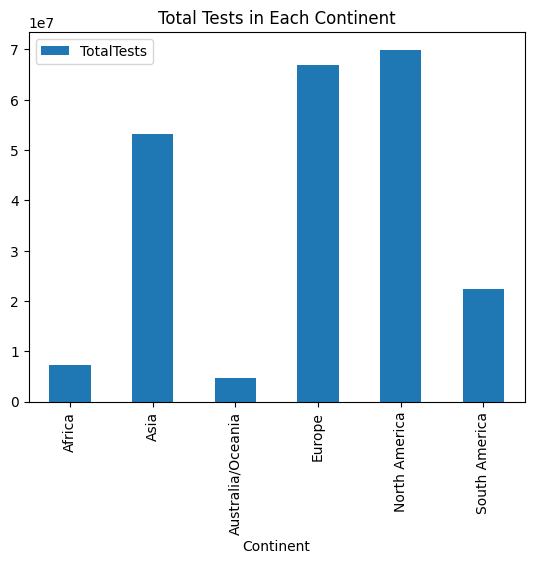

In [ ]:
data[["Continent", "TotalTests"]].groupby("Continent").sum().plot.bar(title="Total Tests in Each Continent")

<Axes: title={'center': 'Total Cases in Each Continent'}, xlabel='Continent'>

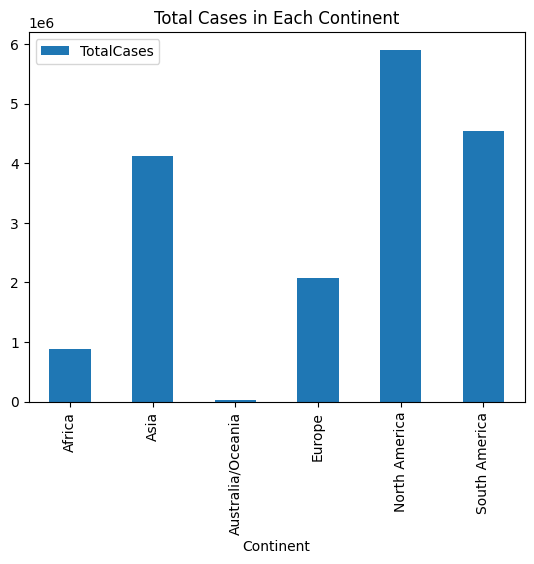

In [ ]:
data[["Continent", "TotalCases"]].groupby("Continent").sum().plot.bar(title="Total Cases in Each Continent")
#df[["Continent", "TotalCases"]].groupby("Continent").mean().plot.bar(title="Mean Cases in Each Continent")

<Axes: title={'center': 'Total Deaths in Each Continent'}, xlabel='Continent'>

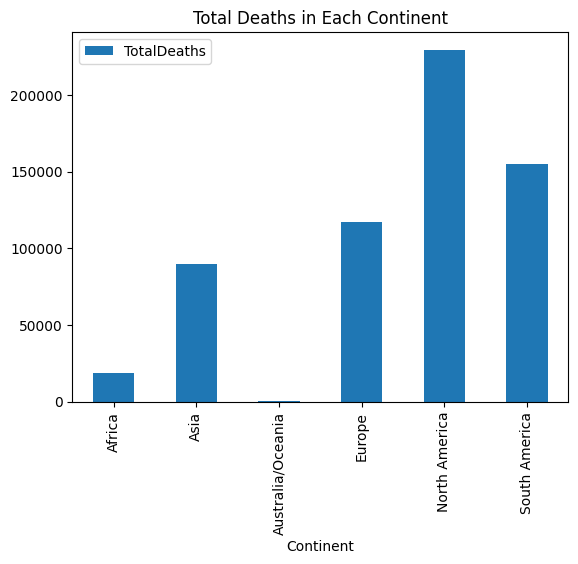

In [ ]:
data[["Continent", "TotalDeaths"]].groupby("Continent").sum().plot.bar(title="Total Deaths in Each Continent")

<Axes: title={'center': 'Total Recovered in Each Continent'}, xlabel='Continent'>

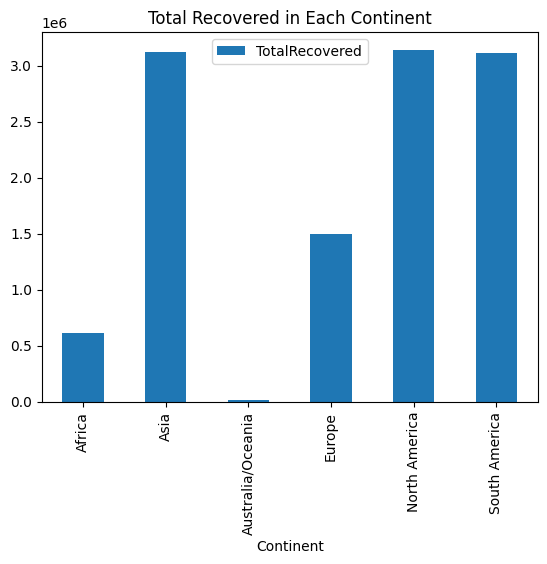

In [ ]:
data[["Continent", "TotalRecovered"]].groupby("Continent").sum().plot.bar(title="Total Recovered in Each Continent")

<Axes: xlabel='Continent'>

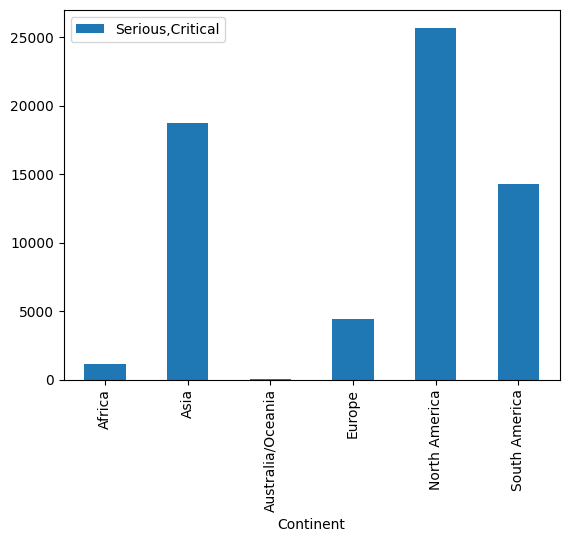

In [ ]:
data[["Continent", "Serious,Critical"]].groupby("Continent").sum().plot.bar()

<Axes: title={'center': 'Deaths/Total Cases Ratio per 1M population'}, xlabel='Continent'>

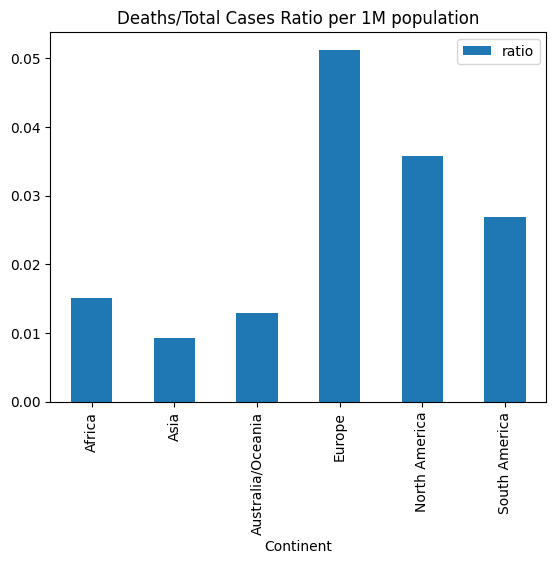

In [ ]:
plotData = data[["Continent", "Tot Cases/1M pop", "Deaths/1M pop"]].groupby("Continent", as_index=False).sum()
ratios = []


for n, x in plotData.iterrows():
  ratios.append((x["Deaths/1M pop"] / x["Tot Cases/1M pop"]))
plotData["ratio"] = ratios
plotData.drop(labels=["Tot Cases/1M pop", "Deaths/1M pop"], axis=1, inplace=True)

plotData.plot.bar(x="Continent", y="ratio", title="Deaths/Total Cases Ratio per 1M population")



<Axes: title={'center': 'Total Cases/Tests Ratio per 1M population'}, xlabel='Continent'>

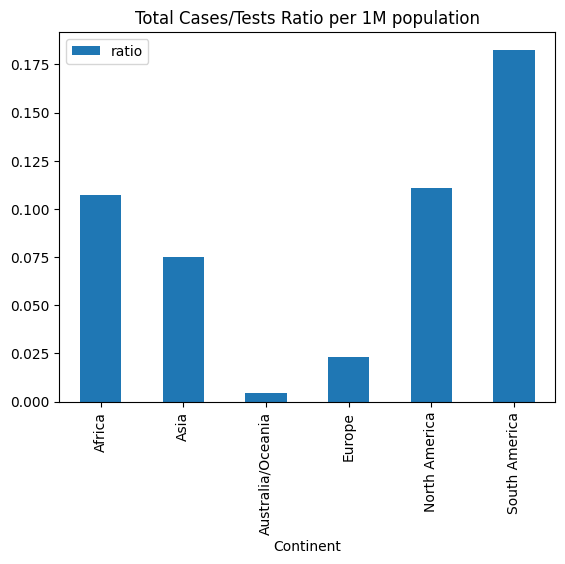

In [ ]:
plotData = data[["Continent", "Tot Cases/1M pop", "Tests/1M pop"]].groupby("Continent", as_index=False).sum()
ratios = []


for n, x in plotData.iterrows():
  ratios.append((x["Tot Cases/1M pop"] / x["Tests/1M pop"]))
plotData["ratio"] = ratios
plotData.drop(labels=["Tot Cases/1M pop", "Tests/1M pop"], axis=1, inplace=True)

plotData.plot.bar(x="Continent", y="ratio", title="Total Cases/Tests Ratio per 1M population")

